#### Totalde verisetlerindeki mevcut etiket sayılarını analiz etmek

In [1]:
import cv2
import numpy as np
import os
from tqdm import tqdm
from IPython.display import clear_output
import random
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
from spiral_tools.utils import path_sequence,format_line
from spiral_tools.constants import label_color_dict_with_hex,label_dict

In [2]:
def count_labels(root):
    '''
    count dataset labels (dataset must be yolo format)
    
    example root : "./datasets/Aerial Maritime/detect"
    '''
    
    label_counts = {
        0:0,
        1:0,
        2:0,
        3:0,
        4:0,
        5:0,
        6:0
    }
    
    frame_count= 0
    labels_path = path_sequence(root,"labels")

    for i,c in tqdm( enumerate(["train","test","val"])):
        labels_file = path_sequence(labels_path,c)

        label_names = os.listdir(labels_file)
       
        for label_name in label_names:
            frame_count += 1
            ## dosyalara ulaş
            print("--",label_name)
             # etiketler
            f = open(path_sequence(labels_file,label_name),"r")
            lines = f.readlines()
            f.close()

            try:
                for line in lines:
                    label, norm_center_x, norm_center_y, norm_width, norm_height = format_line(line)
                    label_counts[int(label)] += 1
            except:
                print(label)

    return label_counts, frame_count

#### tüm datasetler için veri sayılarını bulmak

In [3]:
label_counts = []
frame_counts = []
ds_names = []
for ds in os.listdir("./datasets"):
    ds_counts,frame_count = count_labels(f"./datasets/{ds}/detect")
    
    label_counts.append(np.array(list(ds_counts.values())))
    frame_counts.append(np.array([frame_count]))
    ds_names.append(ds)

clear_output()

label_count_df = pd.DataFrame(data=label_counts,
 columns=["tasit","insan","UAP","UAİ","-TANIMSIZ1","-TANIMSIZ2","-TANIMSIZ3"],
 index=ds_names)

frame_count_df = pd.DataFrame(data=frame_counts,
    columns=["Frame Sayisi"],
    index = ds_names)

In [4]:
label_count_df

,tasit,insan,UAP,UAİ,-TANIMSIZ1,-TANIMSIZ2,-TANIMSIZ3
Aerial_Maritime,135,0,0,0,0,0,0
UYZ_2021_etiketli,21108,7274,379,913,0,0,0
UYZ_2022_OTURUM2_1,5649,5624,0,0,0,0,0
UYZ_2022_OTURUM2_2,7981,694,0,0,0,0,0
UYZ_2022_OTURUM2_3,3512,79,0,0,0,0,0
UYZ_2022_OTURUM2_4,2664,714,0,0,0,0,0
UYZ_2022_OTURUM2_5,2715,1703,481,420,0,0,0
UYZ_etiketlenenler,0,0,50,69,0,0,0
UYZ_etiketlenenler_augmanted,0,0,400,552,0,0,0
UYZ_etiketliler_augmanted,574,6158,1720,2666,0,0,0


In [5]:
frame_count_df

,Frame Sayisi
Aerial_Maritime,103
UYZ_2021_etiketli,3279
UYZ_2022_OTURUM2_1,1046
UYZ_2022_OTURUM2_2,549
UYZ_2022_OTURUM2_3,541
UYZ_2022_OTURUM2_4,724
UYZ_2022_OTURUM2_5,1163
UYZ_etiketlenenler,109
UYZ_etiketlenenler_augmanted,872
UYZ_etiketliler_augmanted,4356


In [6]:
# total
print("Toplam Etiket Sayıları\n",label_count_df.sum())
print()
print("Toplam Frame Sayısı\n",frame_count_df.sum())

Toplam Etiket Sayıları
 tasit         148374
insan          76663
UAP             3030
UAİ             4620
-TANIMSIZ1         0
-TANIMSIZ2         0
-TANIMSIZ3         0
dtype: int64

Toplam Frame Sayısı
 Frame Sayisi    16330
dtype: int64


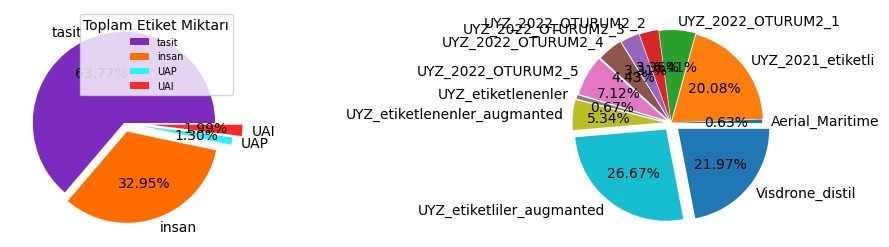

In [14]:
from spiral_tools.utils import show_pie
fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,3,1)
show_pie(
    list(label_count_df.sum())[:4],
    list(label_dict.values())[:4],
    "Toplam Etiket Miktarı",
    [0.0,0.1,0.2,0.3],
    0,
    list(label_color_dict_with_hex.values())[:4],
)
fig.add_subplot(1,3,3)
values = list(frame_count_df["Frame Sayisi"])
labels = list(frame_count_df.index)

show_pie(
    values,
    labels,
    explode=[item*0.01 for item in range(0, len(values))]
)
